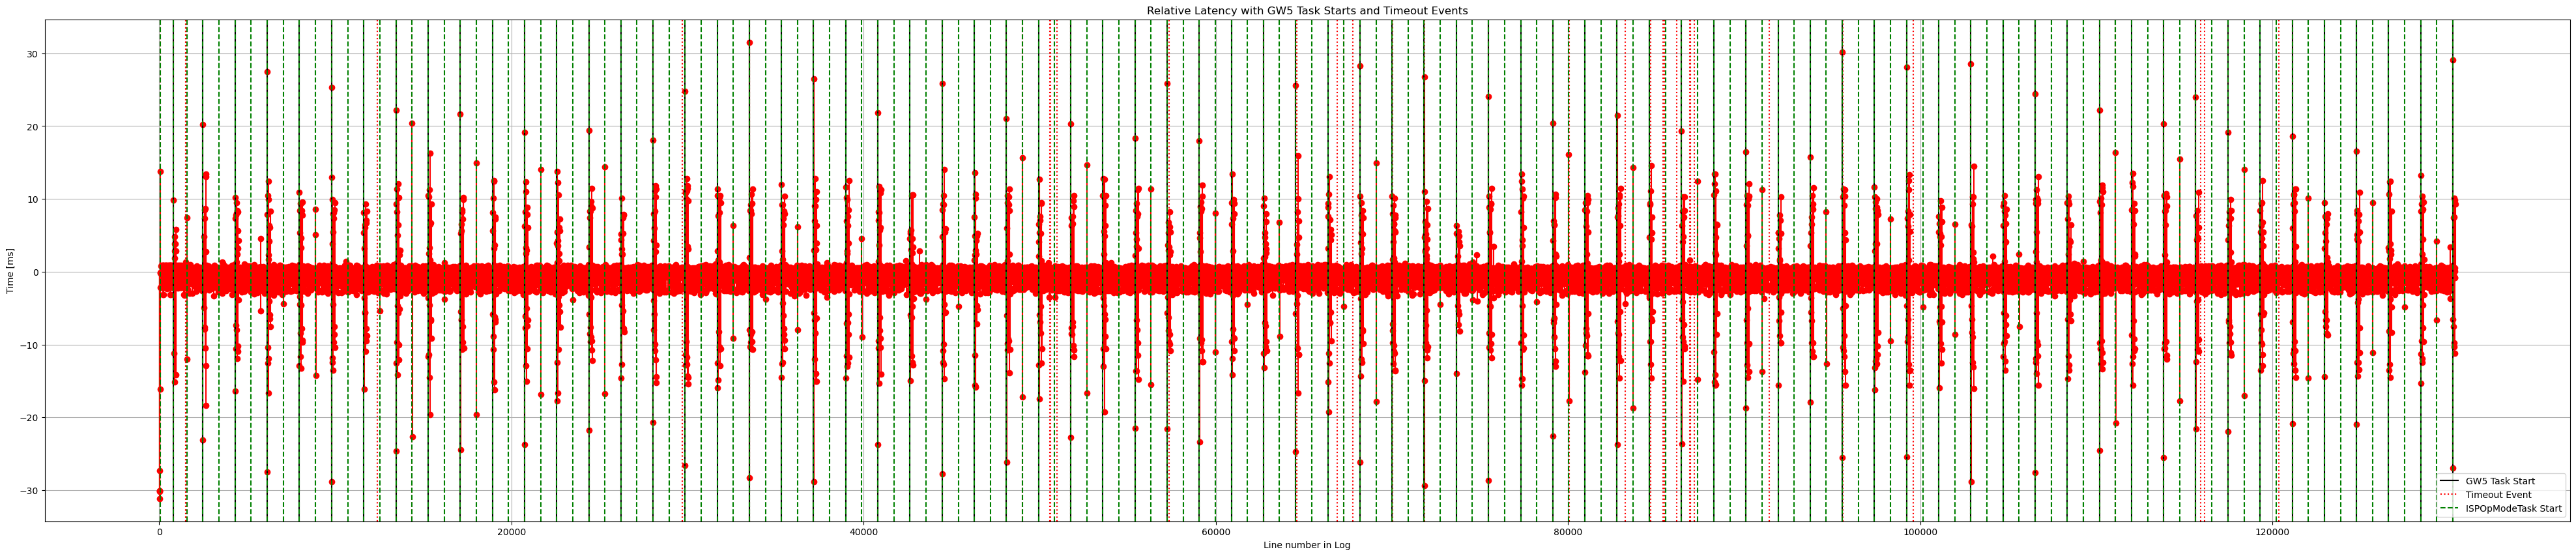

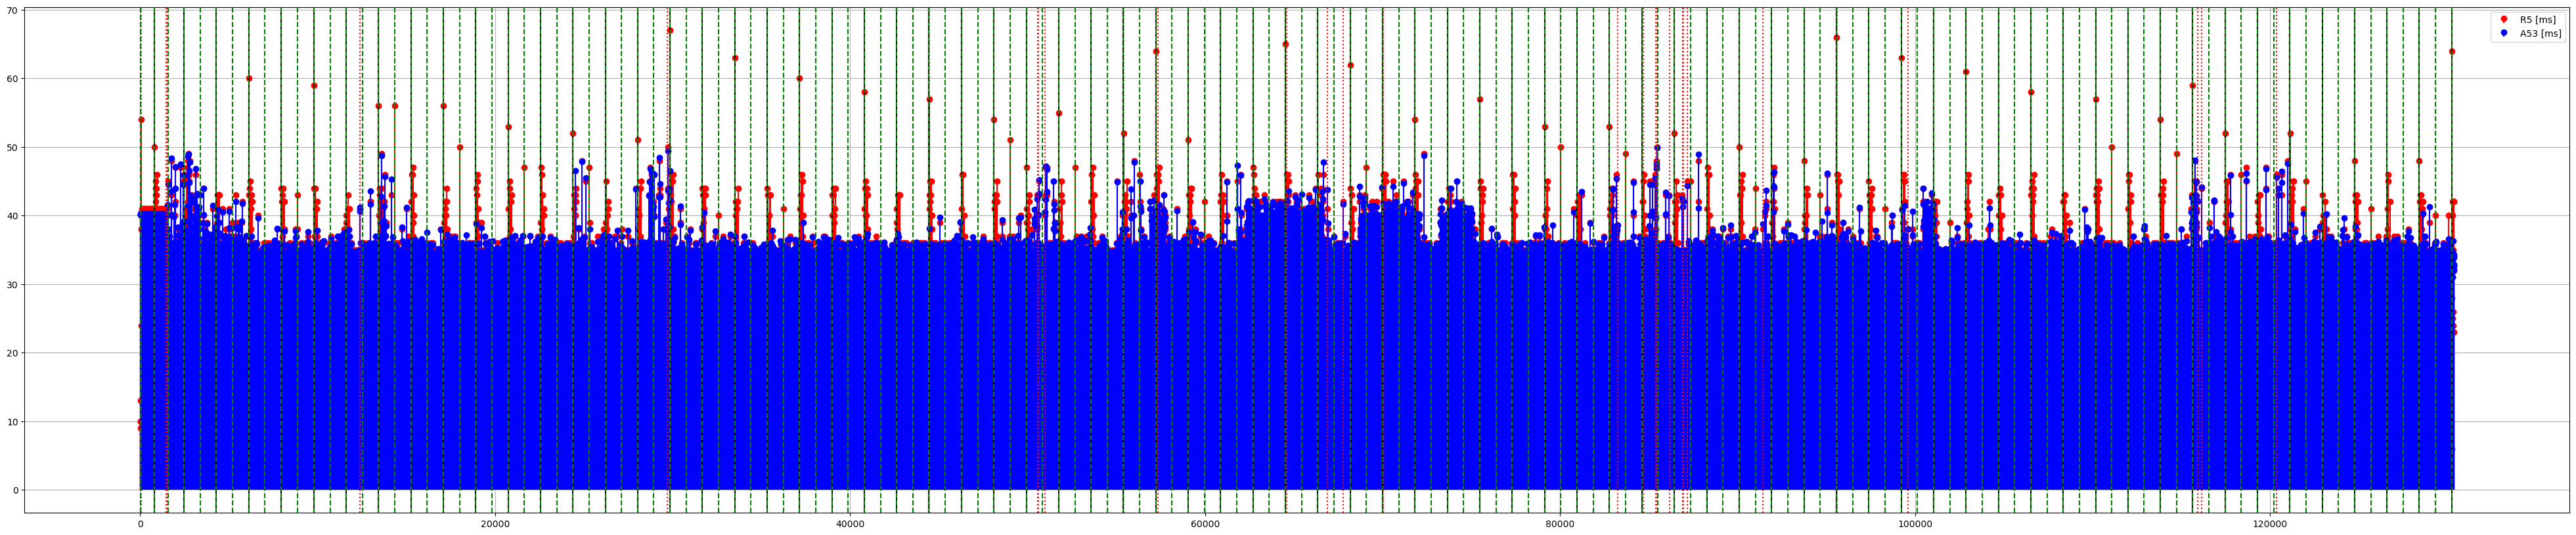

In [7]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 'Exp7StructReduc.txt'
# 'Exp7-TheUltimate.txt'

file_path_r51_comment = 'Exp7StructReduc.txt'
with open(file_path_r51_comment, 'r') as file:
    R5liness1 = file.read().splitlines()

gw5Str = "gw5DIAG"
pattern2 = r'\[(\d+\.\d+)\], \[(\d+)\]: 1 Rec'
search_string2 = "TimeoutTimerSoc1"
ispOPStr = "ISP!"
r5Q = r'idx:\s*\[(\d+)\]'
a53dur1 = []
r51dur1 = []
LineGW51 = []
LineTimeOut1 = []
LineIspOp1 = []
LineLatencyDiff1 = []
Liner5Q1 = []
r5Qidx1 = []
LinesCondensed1 = [] #(line number, pckID), (line number, gw5) if 0, it means it has gw5DIAG task
LinesCondensed_latency_diff1 = []

a53_thresh = 50
r5_thresh = 50

rangeVal = len(R5liness1)
for i in range(rangeVal):
    match1 = re.search(pattern2, R5liness1[i])
    match2 = re.search(gw5Str, R5liness1[i])
    match3 = re.search(search_string2, R5liness1[i])
    match4 = re.search(ispOPStr, R5liness1[i])
    if match1:
        LinesCondensed1.append((i, (float(match1.group(1)), float(match1.group(2)))))
    if match2:
        LinesCondensed1.append((i, gw5Str))
        LineGW51.append(i)
    if match3:
        LinesCondensed1.append((i, search_string2))
        LineTimeOut1.append(i)
    if match4:
        LinesCondensed1.append((i, ispOPStr))
        LineIspOp1.append(i)

for i in range(len(LinesCondensed1)):
    if (LinesCondensed1[i][1] != gw5Str) and (LinesCondensed1[i][1] != search_string2) and (LinesCondensed1[i][1] != ispOPStr):
        for j in range(i + 1, len(LinesCondensed1)):
            if (LinesCondensed1[j][1] != gw5Str) and (LinesCondensed1[j][1] != search_string2) and (LinesCondensed1[j][1] != ispOPStr):
                r5_latency = LinesCondensed1[j][1][1] - LinesCondensed1[i][1][1]
                a53_latency = LinesCondensed1[j][1][0] - LinesCondensed1[i][1][0]
                if (abs(r5_latency - a53_latency) < 100) and a53_latency < 50:
                    LinesCondensed_latency_diff1.append(r5_latency - a53_latency)
                    LineLatencyDiff1.append(LinesCondensed1[j][0])
                    a53dur1.append(a53_latency)
                    r51dur1.append(r5_latency)
                break
            else:
                continue
    else:
        continue

if LineLatencyDiff1 and LinesCondensed_latency_diff1:
    plt.figure(figsize=(50, 10))  # Adjusted figure size for better visibility
    plt.stem(LineLatencyDiff1, LinesCondensed_latency_diff1, linefmt='r-', markerfmt='ro', basefmt=' ')

    # Plot vertical lines for LineGW5
    for index in LineGW51:
        plt.axvline(x=index, color='black', linestyle='-', label='GW5 Task Start' if index == LineGW51[0] else "")

    # Plot vertical lines for LineTimeOut
    for index in LineTimeOut1:
        plt.axvline(x=index, color='red', linestyle=':', label='Timeout Event' if index == LineTimeOut1[0] else "")

    for index in LineIspOp1:
        plt.axvline(x=index, color='green', linestyle='--', label='ISPOpModeTask Start' if index == LineIspOp1[0] else "")


    # plt.plot(Liner5Q, r5Qidx, marker='o', linestyle='-', color='gray', markersize=2, label='Rx Queue in R5')
    plt.title('Relative Latency with GW5 Task Starts and Timeout Events')
    plt.xlabel('Line number in Log')
    plt.ylabel('Time [ms]')
    plt.grid()
    plt.legend()

plt.figure(figsize=(50, 10))
plt.stem(LineLatencyDiff1, r51dur1, linefmt='r-', markerfmt='ro', basefmt=' ', label='R5 [ms]')
plt.stem(LineLatencyDiff1, a53dur1, linefmt='b-', markerfmt='bo', basefmt=' ', label='A53 [ms]')
plt.grid()
plt.legend()

for index in LineGW51:
        plt.axvline(x=index, color='black', linestyle='-', label='GW5 Task Start' if index == LineGW51[0] else "")
        
for index in LineTimeOut1:
    plt.axvline(x=index, color='red', linestyle=':', label='Timeout Event' if index == LineTimeOut1[0] else "")

for index in LineIspOp1:
    plt.axvline(x=index, color='green', linestyle='--', label='ISPOpModeTask Start' if index == LineIspOp1[0] else "")

# print(len(LineTimeOut1)/ len(LinesCondensed_latency_diff1))
# print(len(LineTimeOut1))
# print(len(LinesCondensed_latency_diff1))

# print("Mean: ", np.mean(a53dur1))
# print("Std Dev: ", np.std(a53dur1))
# print("Max: ", max(a53dur1))

# print("Num of times A53 noz cmds greater than 40 ms: ", num_a53_timeouts)
# print("Fraction of A53 being greater than 40 ms: ", num_a53_timeouts/len(a53dur1))
# print("Mean for timeouts in A53 greater than 40 ms: ", a53_timeouts_total/num_a53_timeouts)
# print(len(a53dur1))